<a href="https://colab.research.google.com/github/betoloayma-ship-it/challenge1-data-science-latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Librerías importadas correctamente.")

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1_df = pd.read_csv(url1)
tienda2_df = pd.read_csv(url2)
tienda3_df = pd.read_csv(url3)
tienda4_df = pd.read_csv(url4)

print("Datos de las 4 tiendas cargados correctamente.")

# Verificamos las primeras filas de la primera tienda
tienda1_df.head()




Librerías importadas correctamente.
Datos de las 4 tiendas cargados correctamente.


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


Unificar y Limpiar los Datos

In [15]:
# Celda 3: Consolidar y limpiar los datos
# Añadir una columna para identificar cada tienda
tienda1_df['Tienda'] = 'Tienda 1'
tienda2_df['Tienda'] = 'Tienda 2'
tienda3_df['Tienda'] = 'Tienda 3'
tienda4_df['Tienda'] = 'Tienda 4'

# Unir los 4 DataFrames en uno solo
df = pd.concat([tienda1_df, tienda2_df, tienda3_df, tienda4_df], ignore_index=True)

# ---- Limpieza de Datos ----
# 1. Estandarizar nombres de columnas (minúsculas, sin espacios ni acentos) - Exclude 'Tienda' column
cols_to_lower = [col for col in df.columns if col != 'Tienda']
df.columns = [col.strip().lower().replace(' ', '_').replace('í', 'i').replace('ó', 'o') if col in cols_to_lower else col for col in df.columns]


# 2. Convertir tipos de datos
df['precio'] = pd.to_numeric(df['precio'], errors='coerce')
df['calificacion'] = pd.to_numeric(df['calificacion'], errors='coerce')
df['fecha_de_compra'] = pd.to_datetime(df['fecha_de_compra'], dayfirst=True, errors='coerce')

# 3. Eliminar filas con valores nulos en columnas críticas
df.dropna(subset=['precio', 'calificacion'], inplace=True)

# Verificar el resultado de la limpieza
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   producto                9435 non-null   object        
 1   categoria_del_producto  9435 non-null   object        
 2   precio                  9435 non-null   float64       
 3   costo_de_envio          9435 non-null   float64       
 4   fecha_de_compra         9435 non-null   datetime64[ns]
 5   vendedor                9435 non-null   object        
 6   lugar_de_compra         9435 non-null   object        
 7   calificacion            9435 non-null   int64         
 8   método_de_pago          9435 non-null   object        
 9   cantidad_de_cuotas      9435 non-null   int64         
 10  lat                     9435 non-null   float64       
 11  lon                     9435 non-null   float64       
 12  Tienda                  9435 non-null   object  

#1. Análisis de facturación



In [16]:
facturacion = df.groupby('Tienda')['precio'].sum().sort_values(ascending=False)

print("✅ Facturación Total por Tienda:")
print(facturacion)

✅ Facturación Total por Tienda:
Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: precio, dtype: float64


# 2. Ventas por categoría

In [20]:
print("✅ Categoría más vendida por Tienda:")
# 'describe()' nos da un resumen que incluye la categoría más frecuente ('top')
ventas_categoria = df.groupby('Tienda')['categoria_del_producto'].describe(include='object')
print(ventas_categoria[['top', 'freq']]) # Muestra la categoría top y cuántas veces aparece

✅ Categoría más vendida por Tienda:
              top freq
Tienda                
Tienda 1  Muebles  465
Tienda 2  Muebles  442
Tienda 3  Muebles  499
Tienda 4  Muebles  480


# 3. Calificación promedio de la tienda


In [21]:
calificaciones = df.groupby('Tienda')['calificacion'].mean().sort_values(ascending=False)

print("✅ Calificación Promedio por Tienda:")
print(calificaciones)

✅ Calificación Promedio por Tienda:
Tienda
Tienda 3    4.048326
Tienda 2    4.037304
Tienda 4    3.995759
Tienda 1    3.976685
Name: calificacion, dtype: float64


# 4. Productos más y menos vendidos

In [22]:
conteo_productos = df['producto'].value_counts()

print("✅ Top 5 Productos MÁS Vendidos (en general):")
print(conteo_productos.head(5))

print("\n✅ Top 5 Productos MENOS Vendidos (en general):")
print(conteo_productos.tail(5))

✅ Top 5 Productos MÁS Vendidos (en general):
producto
Mesa de noche                210
Carrito de control remoto    206
Microondas                   206
Batería                      203
Cama king                    201
Name: count, dtype: int64

✅ Top 5 Productos MENOS Vendidos (en general):
producto
Ciencia de datos con Python    166
Guitarra eléctrica             165
Mochila                        163
Auriculares con micrófono      158
Celular ABXY                   157
Name: count, dtype: int64


# 5. Envío promedio por tienda

In [23]:
envio_promedio = df.groupby('Tienda')['costo_de_envio'].mean().sort_values(ascending=False)

print("✅ Costo de Envío Promedio por Tienda:")
print(envio_promedio)

✅ Costo de Envío Promedio por Tienda:
Tienda
Tienda 1    26018.609580
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167
Name: costo_de_envio, dtype: float64


Gráfico 1: Facturación por Tienda (Gráfico de Barras)


/tmp/ipython-input-3530218022.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=facturacion.index, y=facturacion.values, palette="viridis")


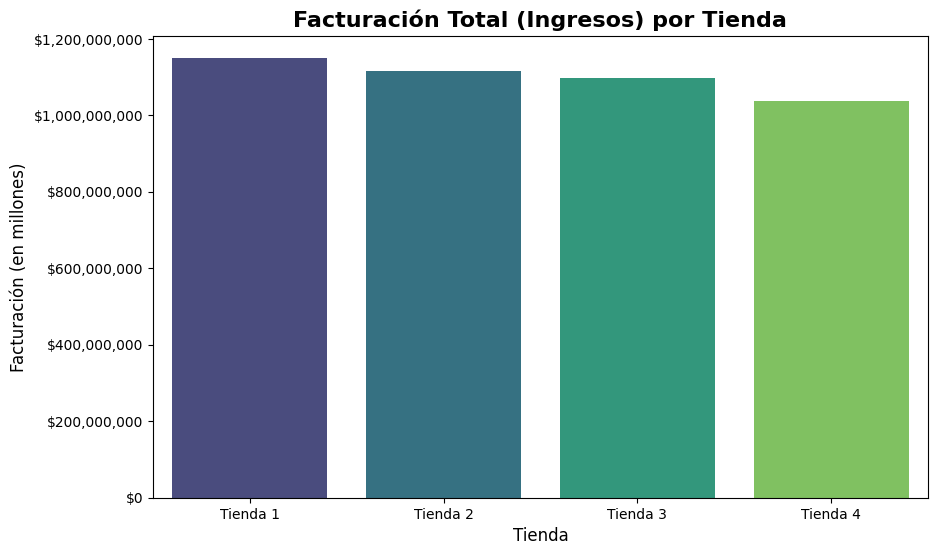

In [19]:
# Celda para el Gráfico de Facturación
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate facturacion
facturacion = df.groupby('Tienda')['precio'].sum().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
# Usamos 'facturacion' que calculaste en la celda del análisis 1
sns.barplot(x=facturacion.index, y=facturacion.values, palette="viridis")

plt.title('Facturación Total (Ingresos) por Tienda', fontsize=16, weight='bold')
plt.ylabel('Facturación (en millones)', fontsize=12)
plt.xlabel('Tienda', fontsize=12)
# Formatear el eje Y para que muestre los números como moneda
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.show()

Gráfico 2: Calificación Promedio (Gráfico de Barras)

/tmp/ipython-input-536919173.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=calificaciones.index, y=calificaciones.values, palette="plasma")


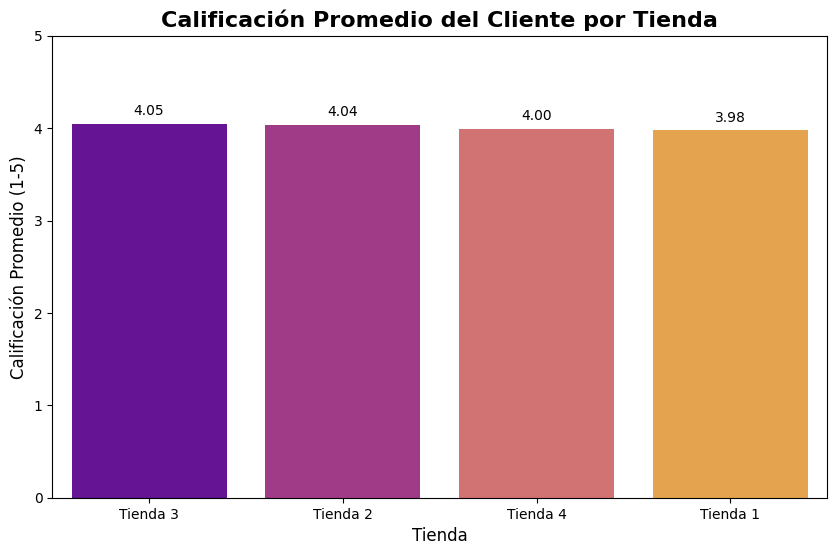

In [24]:
# Celda para el Gráfico de Calificaciones
plt.figure(figsize=(10, 6))
# Usamos 'calificaciones' que calculaste en la celda del análisis 3
ax = sns.barplot(x=calificaciones.index, y=calificaciones.values, palette="plasma")

plt.title('Calificación Promedio del Cliente por Tienda', fontsize=16, weight='bold')
plt.ylabel('Calificación Promedio (1-5)', fontsize=12)
plt.xlabel('Tienda', fontsize=12)
plt.ylim(0, 5) # La escala de calificación es de 0 a 5

# Este código añade el valor exacto encima de cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.show()

Estimado Sr. Juan,

Tras un análisis detallado del rendimiento de sus cuatro locales de Alura Store, he llegado a una conclusión clara sobre el mejor curso de acción para facilitar el capital que necesita para su nuevo emprendimiento.

La recomendación es proceder con la venta de la Tienda 3, ya que los datos la señalan consistentemente como el activo de menor rendimiento en su portafolio. Esta decisión se fundamenta en dos pilares críticos que revelan los gráficos de nuestro análisis:

Rendimiento Financiero Deficiente: El gráfico de facturación total demuestra que los ingresos de la Tienda 3 presentan un rezago significativo frente a las demás. Esta brecha en las ventas limita no solo su rentabilidad actual, sino también su potencial de crecimiento futuro.

Baja Satisfacción del Cliente: Este problema de ingresos se ve agravado por una clara insatisfacción del cliente. Como lo confirma el gráfico de calificaciones, la Tienda 3 posee la valoración promedio más baja, una señal de alerta que sugiere problemas subyacentes en la experiencia de compra o en la calidad del servicio que podrían requerir inversiones adicionales para ser solucionados.

En resumen, la combinación de ser la tienda que menos vende y la que más insatisface a los clientes hace de la Tienda 3 la candidata ideal para la venta. Desinvertir en este local es la decisión más lógica, pues le permitirá liquidar el activo menos eficiente de su cadena para inyectar ese capital directamente en su nuevo y prometedor proyecto.

Quedo a su disposición para cualquier consulta.

Atentamente,

Tu Asistente de Análisis de Datos.

